# Keras에서 구현하기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
# 흑백 이미지 임을 알 수 있다.
train_input.shape

(60000, 28, 28)

In [ ]:
train_input.reshape(-1, 28, 28, 1).shape

(60000, 28, 28, 1)

train_input[0]

In [ ]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

### 신경망 생성

In [ ]:
model = keras.Sequential()

* 32는 커널의 갯수를 의미합니다. 
* 커널 사이즈는 (3, 3)을 의미합니다. 

In [ ]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', 
                              input_shape=(28,28,1)))

* 풀링의 크기는 2입니다. 즉 가로세로 크기를 절반으로 줄입니다. 

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

1. kernel_size의 값이 3이기 때문에 커널의 크기가 (3, 3) 깊이가 1, 그리고 편향 32개 
    * 3 x 3 x 1 x 32 + 32 = 320

2. 64개의 커널을 사용하고 커널의 크기가 (3, 3)
    * 3 x 3 x 32 x 64 + 64 = 18496
    
3. Flatten 클래스에서 (7, 7, 64) 크기의 특성 맵을 1차원 배열로 펼치면 (3136) 크기의 배열이 됩니다. 


4. 3136 x 100 + 100 = 313700

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


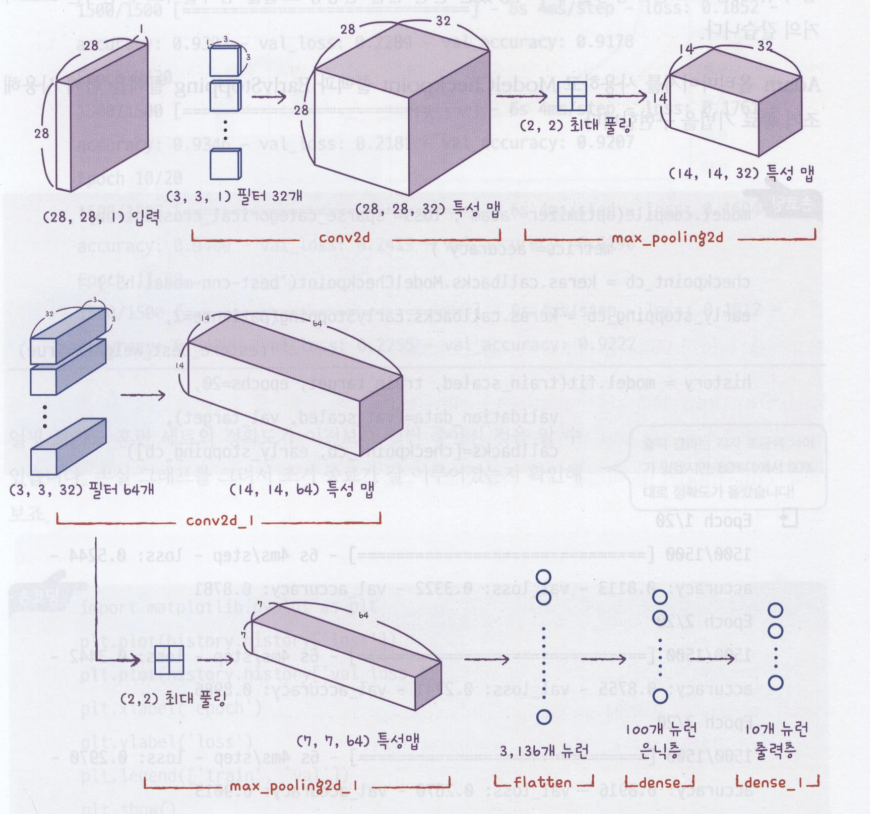

### 모델 컴파일과 훈련

#### 콜백
* 콜백(callback)은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들입니다. 
* ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장합니다. 

------------
* 검증 로스값이 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 더 진행할 필요가 없습니다. 
* 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기 종료(early stopping)이라고 부르며, 널리 사용됩니다. 
* EalryStopping 콜백을 지원합니다. 
    * patience는 검증 점수가 향상되지 않더라도 참을 에포크 횟수 
    * restore_best_weights는 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌립니다. 

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 28s 18ms/step - loss: 0.5446 - accuracy: 0.8043 - val_loss: 0.3438 - val_accuracy: 0.8723
Epoch 2/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3665 - accuracy: 0.8700 - val_loss: 0.2923 - val_accuracy: 0.8928
Epoch 3/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3153 - accuracy: 0.8859 - val_loss: 0.2678 - val_accuracy: 0.9013
Epoch 4/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2834 - accuracy: 0.8980 - val_loss: 0.2529 - val_accuracy: 0.9066
Epoch 5/20
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2588 - accuracy: 0.9065 - val_loss: 0.2397 - val_accuracy: 0.9124
Epoch 6/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2411 - accuracy: 0.9116 - val_loss: 0.2390 - val_accuracy: 0.9126
Epoch 7/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2222 - accuracy: 0.9180 - val_loss: 0.2333 -

* Adam 옵티마이저를 사용하고, ModelCheckpoint 콜백과 EarlyStopping 콜백을 함께 사용하여 조기 종료 기법 구현

In [ ]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.80765968e-02,  1.48463964e-01, -1.41029041e-02,
           -2.17062328e-02, -2.11156368e-01, -3.38486314e-01,
           -1.20309293e-01,  8.41018483e-02, -1.25995390e-02,
            1.07140422e-01,  1.14770465e-01,  4.38368395e-02,
           -4.94987257e-02,  1.18396040e-02, -4.49089296e-02,
           -4.83448803e-01, -2.18538105e-01,  1.78668559e-01,
            1.85668990e-01, -1.71301868e-02, -2.17029899e-01,
           -1.63208932e-01, -1.43736109e-01,  1.77244172e-01,
           -2.04004347e-01, -5.93958683e-02,  2.38012016e-01,
           -4.25027192e-01,  3.38426739e-01,  9.77156460e-02,
            3.41144092e-02,  1.29929915e-01]],
 
         [[-4.89587903e-01, -1.55250683e-01,  3.36766466e-02,
           -1.46405637e-01,  2.66789705e-01, -1.43705839e-02,
            1.95821628e-01,  1.80899426e-01, -4.10514534e-01,
            3.36712226e-02,  2.64086425e-02, -4.39233899e-01,
         

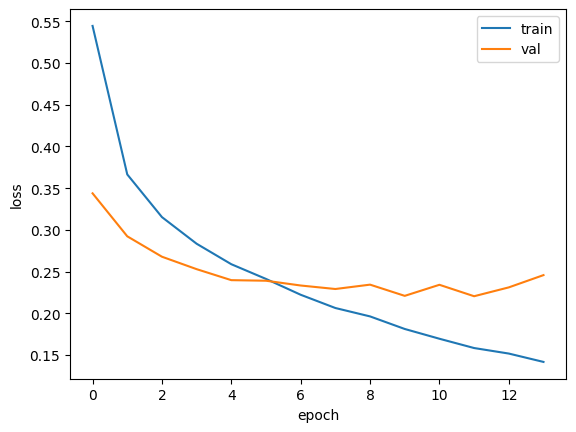

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

* 검증 세트에 대한 손실이 점차 감소하다가 정체되기 시작하고 훈련 세트에 대한 손실은 점점 더 낮아지고 있습니다. 

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.2204 - accuracy: 0.9240


[0.2204051911830902, 0.9240000247955322]

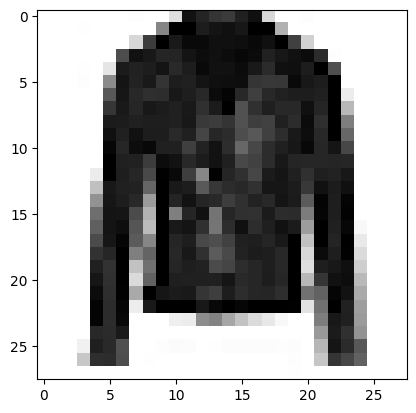

In [ ]:
plt.imshow(val_scaled[56].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
val_target[56]

4

In [ ]:
val_scaled[56:57].shape  # 인덱싱을 활용해 차원을 늘리기

(1, 28, 28, 1)

In [ ]:
val_scaled[56].shape

(28, 28, 1)

In [ ]:
val_scaled[56:57].shape

(1, 28, 28, 1)

In [ ]:
preds = model.predict(val_scaled[56:57])
print(preds)

1/1 [==============================] - 0s 97ms/step
[[3.5460925e-08 4.6315906e-11 7.8771374e-04 2.1051130e-09 9.9308538e-01
  1.1076789e-11 6.1268602e-03 1.8075145e-13 1.1716650e-09 8.2976508e-12]]


In [ ]:
import numpy as np

In [ ]:
np.argmax(preds)

4

In [ ]:
preds.sum()

1.0

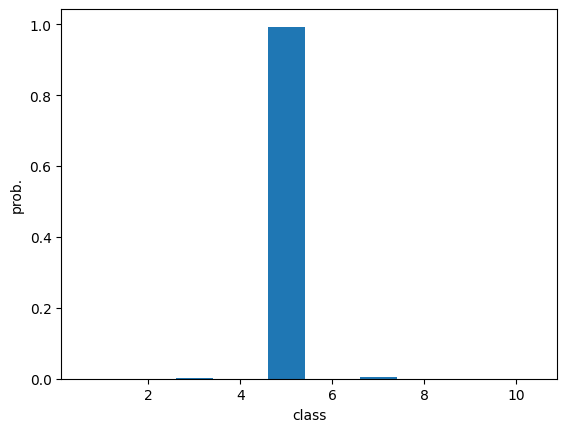

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠'] 

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

코트


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2502 - accuracy: 0.9153


[0.25018101930618286, 0.9153000116348267]

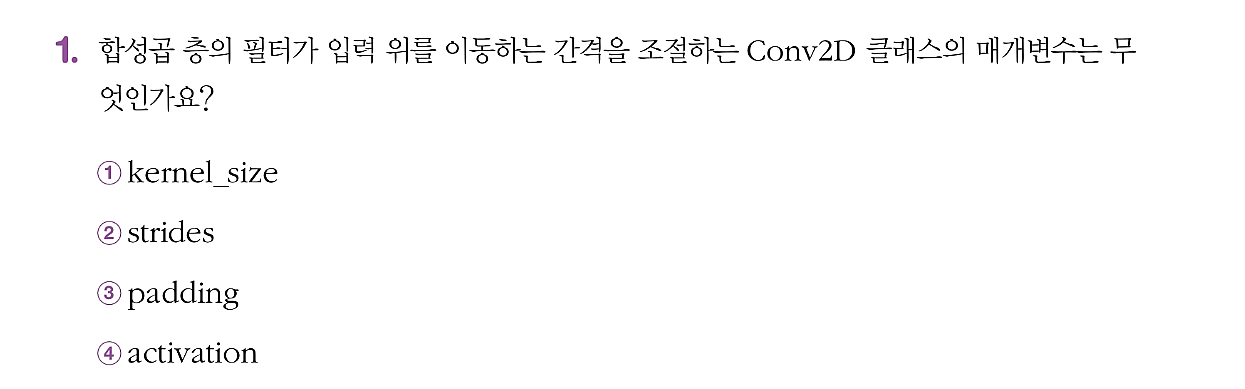

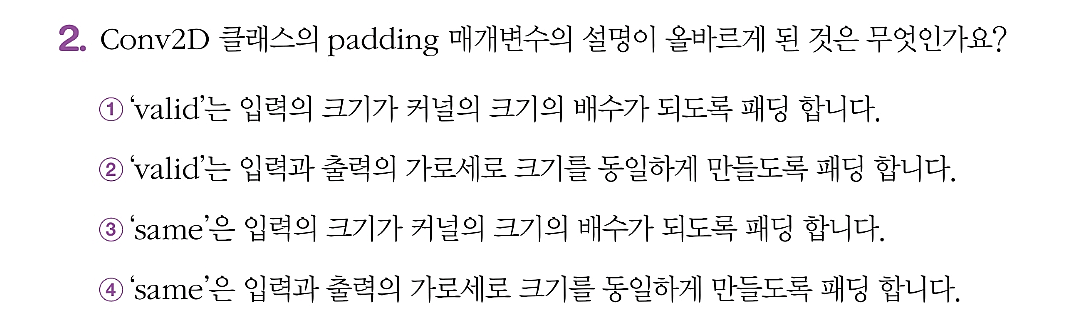

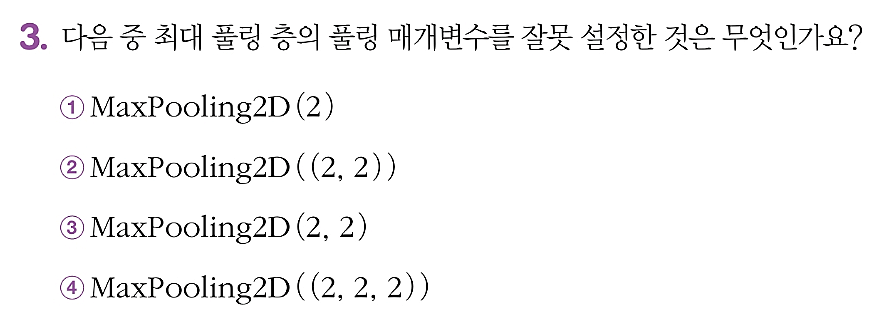

# 가중치 시각화
* 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 합니다.
* 예를 들어 다음과 같은 가중치는 둥근 모서리가 있는 영역에서 크게 활성화되고 그렇지 않은 영역에서는 낮은 값을 만든 것입니다.

# 이미지 보강 
* 이미지 보강(Image Augmentation)은 원본 이미지를 대상으로 일정한 변형을 가해서 새롭게 이미지를 생성하는 방법입니다. 
* 훈련 데이터셋이 부족할 경우 사용하면 성능 향상을 확인 할 수 있습니다. 
----
* 아래 예제 코드는 신발 이미지의 신발코가 오른쪽을 향하는 이미지가 있을 경우, 컨볼루션 신경망은 테스트 데이터에서 새롭게 나오는 이미지에 대해 좋은 퍼포먼스를 내지 못합니다. 
* 이미지를 가로로 뒤집어(horizontal flip)
* 회전(rotate)
* 기울이거나(shear)
* 일부 확대하거나(zoom)
* 평행이동(shift)
* 위의 행위를 통하여 데이터 셋을 보강 시킵니다. 

# LeNet
* 튜링 상을 수상한 얀 르쿤은 간단한 기하학적 변형과 왜곡에도 불구하고 견고하게 MNIST 필기 문자를 인식하게 훈련된 LeNet이라는 ConvNet군을 제안 
* 핵심 아이디어는 최대 풀링 작업을 통해 더 낮은 계층에서 컨볼루션 연산을 교대로 수행하는 것 

# CIFAR-10 이미지 인식
* CIFAR-10 데이터셋에는 3개의 채널로 32x32 픽셀의 60,000개 컬러 이미지가 10개의 부류로 나눠져 있음 
* 각 부류에는 6,000개의 이미지가 포함돼 있음 
* 훈련 셋에는 50,000개의 이미지가 있고 테스트 셋에는 10,000개의 이미지가 존재 

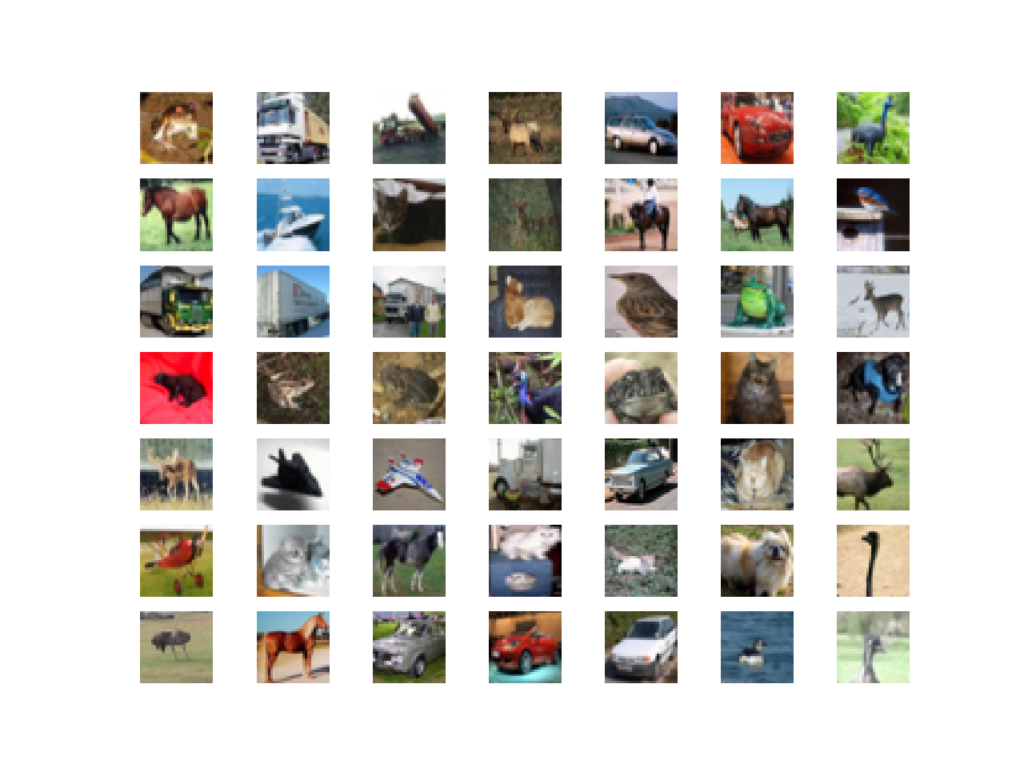

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()

In [ ]:
def build(input_shape, classes):
	model = models.Sequential() 
	model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
	model.add(layers.MaxPooling2D(pool_size=(2, 2)))
	model.add(layers.Dropout(0.25)) 

	model.add(layers.Flatten())
	model.add(layers.Dense(512, activation='relu'))
	model.add(layers.Dropout(0.5))
	model.add(layers.Dense(classes, activation='softmax'))
	return model

In [ ]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

In [ ]:
# use TensorBoard, princess Aurora!
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])
 
model.fit(X_train, y_train, batch_size=BATCH_SIZE,
	epochs=EPOCHS, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE, callbacks=callbacks) 
score = model.evaluate(X_test, y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

## CIFAR-10 성능 향상
* 첫 번째 모듈 : (CONV + CONV + MaxPool + DropOut)

* 두 번째 모듈 : (CONV + CONV + MaxPool + DropOut)

* 세 번째 모듈 : (CONV + CONV + MaxPool + DropOut)


### 배치 정규화
* 2015년 한 논문에서 세르게이 이오페와 치리슈티언 세게지가 기울기 소실과 폭주 문제를 해결하기 위한 배치 정규화를 기법을 제안 
* 이 기법은 각 층에서 활성화 함수를 통과하기 전이나 후에 모델에 연산을 하나 추가 
* 이 연산은 단순하게 입력을 원점에 맞추고 정규화한 다음, 각 층에서 두 개의 새로운 파라미터로 결과값의 스케일을 조정하고 이동 
* 하나는 스케일 조정에, 다른 하나는 이동에 사용

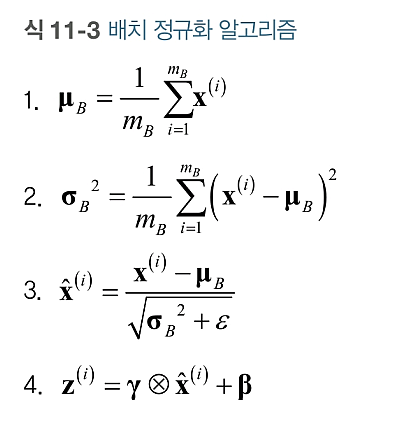

* 입력 데이터를 원점에 맞추고 정규화하려면 알고리즘은 평균과 표준편차를 추정해야 합니다. 
* 이를 위해 현재 미니배치에서 입력의 평균과 표준편차를 평가합니다. 

* 배치 정규화 구현은 층의 입력 평균과 표준편차의 이동 평균을 사용해 훈련하는 동안 최종 통계를 추정 
* 케라스의 BatchNormalization 층은 이를 자동으로 수행

In [ ]:
import tensorflow as tf
print (tf.test.gpu_device_name())

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers


#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = models.Sequential()
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(20, (5, 5), activation='relu',
			input_shape=input_shape))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(layers.Flatten())
		model.add(layers.Dense(500, activation='relu'))
		# a softmax classifier
		model.add(layers.Dense(classes, activation="softmax"))
		return model

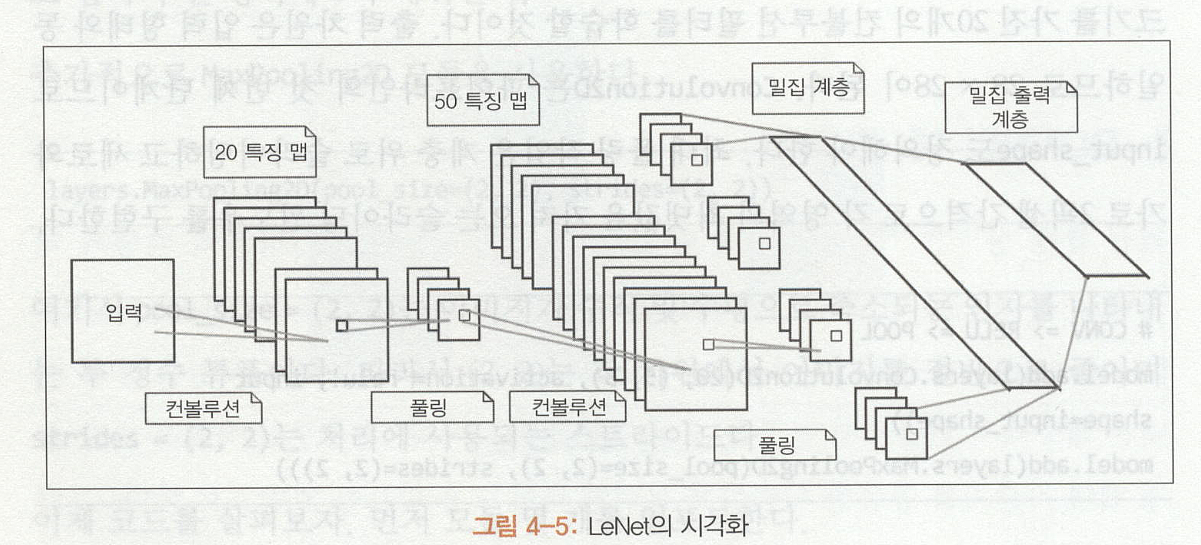

* 두 번째 컨볼루션 단계에서 필터의 수를 이전 20개에서 50개로 늘린다. 
* 더 깊은 계층에서 필터 수를 늘리는 것은 딥러닝에 사용되는 일반적인 기술임 

In [ ]:
# network and training
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.20

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10  # number of outputs = number of digits

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)


60000 train samples
10000 test samples


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 20)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 50)          25050     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 50)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 500)              

(5, 5) 20 

In [ ]:
5 * 5 * 20 + 20

520

In [ ]:
20 * 5 * 5 * 50 + 50

25050

In [ ]:
# use TensorBoard, princess Aurora!
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

# fit 
history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=EPOCHS, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
		callbacks=callbacks)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


Epoch 1/20
375/375 [==============================] - 23s 59ms/step - loss: 0.2111 - accuracy: 0.9362 - val_loss: 0.0697 - val_accuracy: 0.9793
Epoch 2/20
375/375 [==============================] - 21s 57ms/step - loss: 0.0551 - accuracy: 0.9835 - val_loss: 0.0549 - val_accuracy: 0.9830
Epoch 3/20
375/375 [==============================] - 21s 55ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0467 - val_accuracy: 0.9852
Epoch 4/20
375/375 [==============================] - 23s 62ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0391 - val_accuracy: 0.9880
Epoch 5/20
375/375 [==============================] - 22s 60ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0338 - val_accuracy: 0.9902
Epoch 6/20
375/375 [==============================] - 21s 55ms/step - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.0391 - val_accuracy: 0.9881
Epoch 7/20
375/375 [==============================] - 21s 56ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0346 - val_accuracy:

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir {'./logs'}

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [ ]:
! pip install image

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 8.1/8.1 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 42.8/42.8 kB ? eta 0:00:00
     -------------------------------------- 336.7/336.7 kB 6.9 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19483 sha256=1d3eb890259bc3c0ed08186d437492a19a3b4c8f676f516386d9c9da646a8403
  Stored in directory: c:\users\sj926\appdata\local\pip\cache\wheels\70\0c\a4\7cfa53a5c6225c2db2bfec08e782b43d0f25fdae2e995b69be
Successfully built image


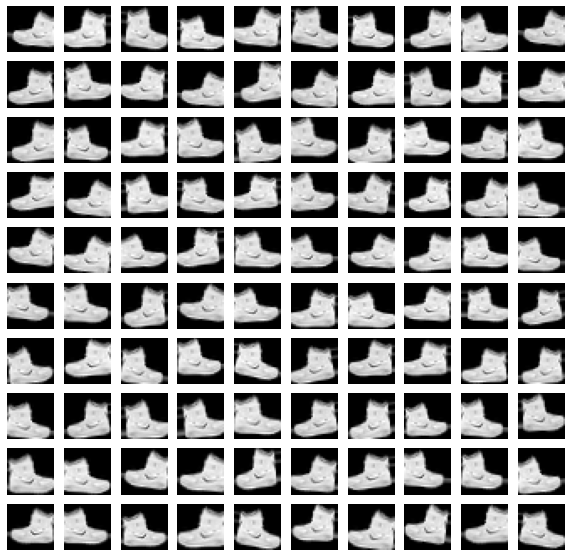

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 이 ImageDataGenerator 코드 부분은 다음 링크에서 참조했습니다. 
# https://github.com/franneck94/MNIST-Data-Augmentation/blob/master/mnist.py
# rotation, zoom, shift, flip 등을 지정합니다.
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_input[0].reshape(28*28),100).reshape(-1,28,28,1), np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

* Fashion MNIST에는 보통 이미지가 위아래로 반듯하게 놓여 있기 때문에 세로축으로 뒤집는 vertical_flip 옵션을 사용하면 오히려 성능이 떨어집니다. 

In [ ]:
train_input.shape

(60000, 28, 28)

In [ ]:
train_input = train_input.reshape(-1, 28, 28, 1)

In [ ]:
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 30000

randidx = np.random.randint(train_input.shape[0], size=augment_size)

In [ ]:
train_input.shape

(60000, 28, 28, 1)

In [ ]:
x_augmented = train_input[randidx].copy()
y_augmented = train_target[randidx].copy()


In [ ]:
x_augmented.shape

(30000, 28, 28, 1)

* flow() 함수는 실제로 보강된 이미지를 생성합니다. 이 함수는 Iterator라는 객체를 만드는데, 이 객체에서 값을 순차적으로 꺼낼 수 있습니다. 
* 값을 꺼내는 방법은 next() 함수를 사용하는 것입니다. 

In [ ]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
train_X = np.concatenate((train_input, x_augmented))
train_Y = np.concatenate((train_target, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


In [ ]:
train_X = train_X/ 255.0

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', 
                              input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2)) 	
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_X, train_Y, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
2813/2813 [==============================] - 77s 27ms/step - loss: 0.5719 - accuracy: 0.7892 - val_loss: 0.3053 - val_accuracy: 0.8904
Epoch 2/20
2813/2813 [==============================] - 70s 25ms/step - loss: 0.3994 - accuracy: 0.8529 - val_loss: 0.2340 - val_accuracy: 0.9163
Epoch 3/20
2813/2813 [==============================] - 74s 26ms/step - loss: 0.3471 - accuracy: 0.8719 - val_loss: 0.2126 - val_accuracy: 0.9221
Epoch 4/20
2813/2813 [==============================] - 67s 24ms/step - loss: 0.3120 - accuracy: 0.8845 - val_loss: 0.1871 - val_accuracy: 0.9307
Epoch 5/20
2813/2813 [==============================] - 67s 24ms/step - loss: 0.2871 - accuracy: 0.8937 - val_loss: 0.1727 - val_accuracy: 0.9352
Epoch 6/20
2813/2813 [==============================] - 67s 24ms/step - loss: 0.2657 - accuracy: 0.9007 - val_loss: 0.1623 - val_accuracy: 0.9378
Epoch 7/20
2813/2813 [==============================] - 70s 25ms/step - loss: 0.2490 - accuracy: 0.9057 - val_loss: 0.1411 -

KeyboardInterrupt: 

In [ ]:
model.evaluate(val_scaled, val_target)

In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


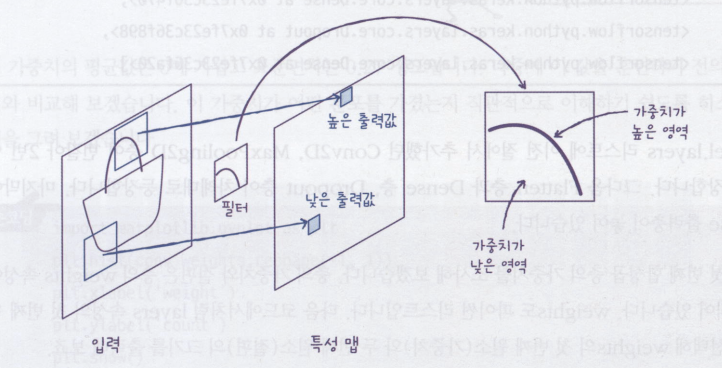

* 이 필터의 가운데 곡선 부분의 가중치 값은 높고 그 외 부분의 가중치 값은 낮을 것입니다.
* 이렇게 해야 둥근 모서리가 있는 입력과 곱해져서 큰 출력을 만들기 때문입니다. 

In [ ]:
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers

## 첫번째 가중치 층

In [ ]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.0046492615 0.24391814


In [ ]:
import matplotlib.pyplot as plt

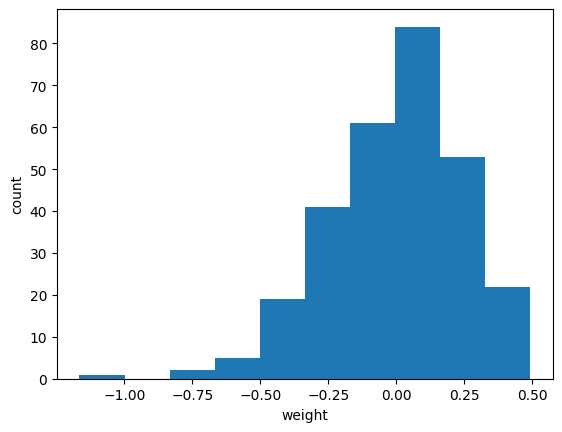

In [ ]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

* imshow() 함수는 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현 
* 0.1이나 0.4나 어떤 값이든지 그 배열의 최댓값이면 가장 밝은 노란 색으로 표현

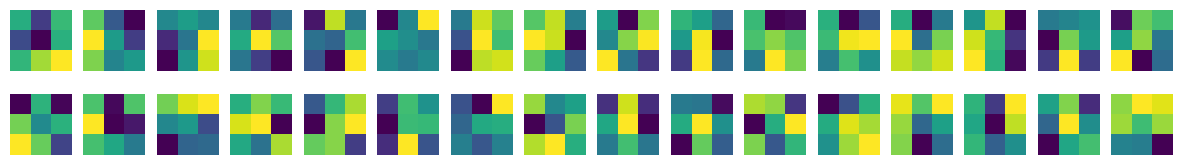

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j])
        axs[i, j].axis('off')

plt.show()

* 어떤 절대값으로 기준을 정해서 픽셀의 강도를 나타내야 하므로, vmin, vmax로 범위 지정 

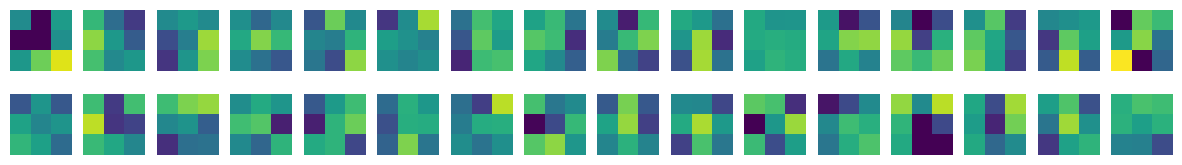

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

## 훈련되지 않은 Conv2D 층 하나 추가

In [ ]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.0049524335 0.08004792


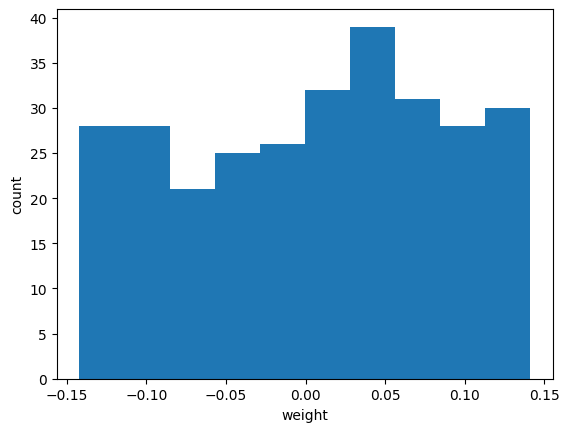

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

* 이 그래프는 훈련된 값이 저장된 값과 확실히 다르다는 것을 확인 
* 대부분의 가중치가 -0.15 ~ 0.15 사이에 있고 비교적 고른 분포를 보임 
* 이런 이유는 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문임 

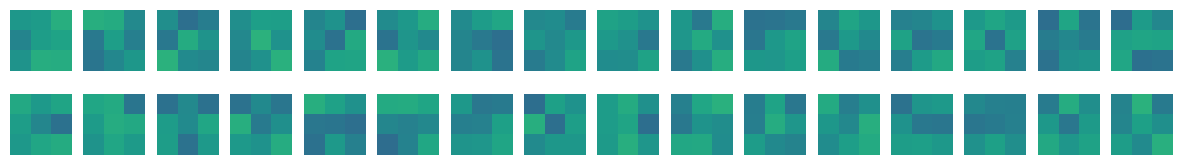

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

## 함수형 API

* 신경망 모델을 만들 때 케라스 sequential 클래스를 사용했습니다. 
* 딥러닝에서 좀 더 복잡한 모델을 만들 때 예를 들어 입력이 2개고, 출력도 2개인 경우 이런 경우는 seqeuntial 클래스를 사용하기 어렵습니다.
* 이런 경우 함수형 API를 사용합니다

* Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현 

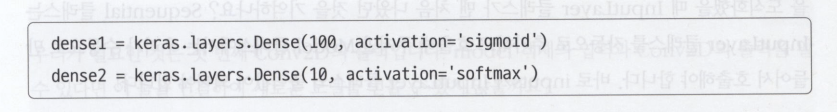

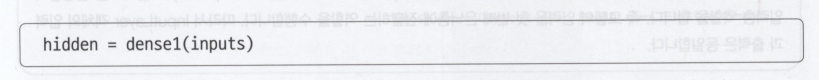

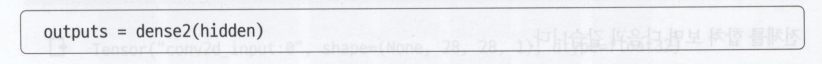

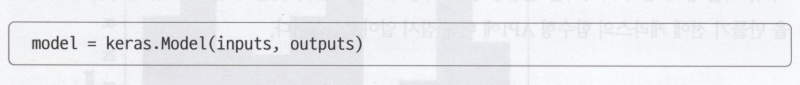

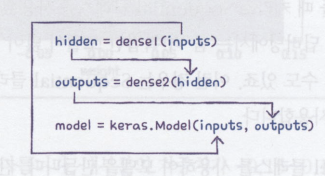

* Input() 함수를 별도로 제공하기 때문에 입력의 크기를 지정하는 shape 매개변수와 함께 이 함수를 호출하면 InputLayer 클래스 객체를 만들어 출력을 반환해 줍니다.

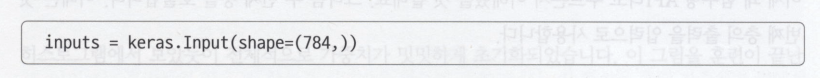

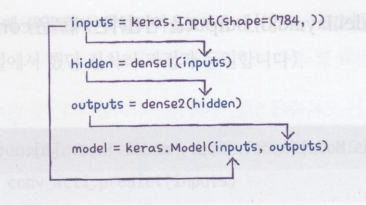

***

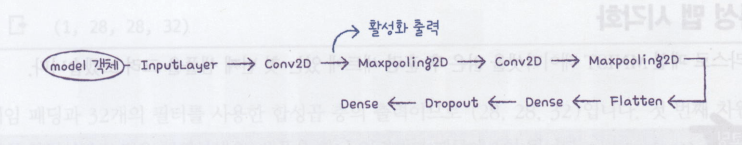

* 우리가 필요한 것은 첫 번째 Conv2D의 출력입니다.
* model 객체의 입력과 Conv2D의 출력을 알수 있다면 이 둘을 연결하여 새로운 모델을 얻을 수 있지 않을까요?

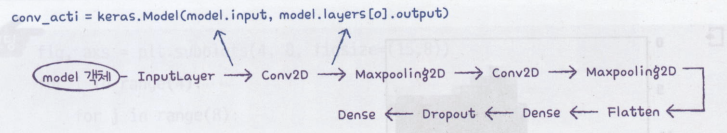

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
conv_acti = keras.models.Model(model.input, model.layers[0].output)

In [ ]:
conv_acti.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


### 특성맵의 시각화

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

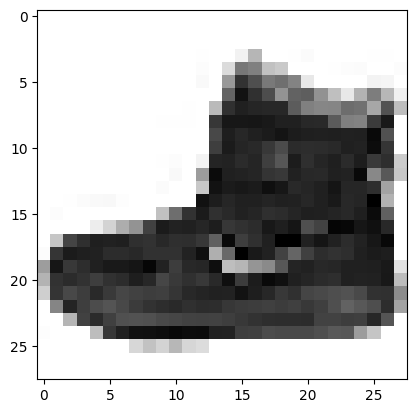

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 43ms/step


In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


* 32개의 특성 맵을 그려보면 아래와 같습니다

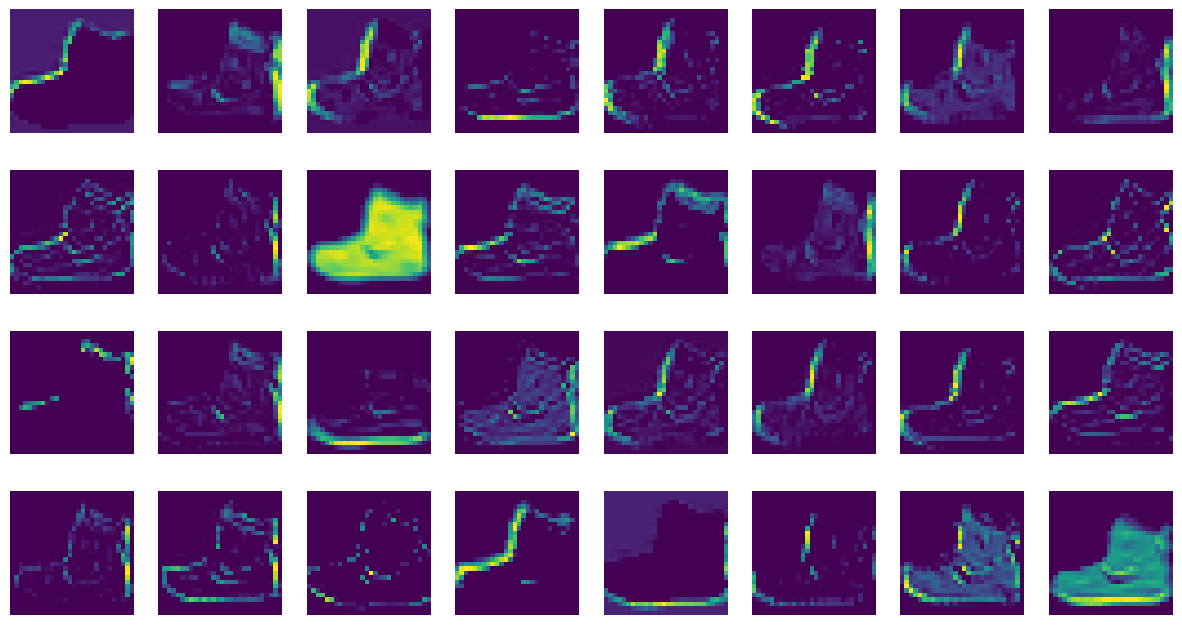

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

* 이 특성 맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여 줍니다. 

In [ ]:
conv2_acti = keras.models.Model(model.input, model.layers[2].output)

In [ ]:
conv2_acti.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


### 두 번째 합성곱에서 출력

In [ ]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 47ms/step


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


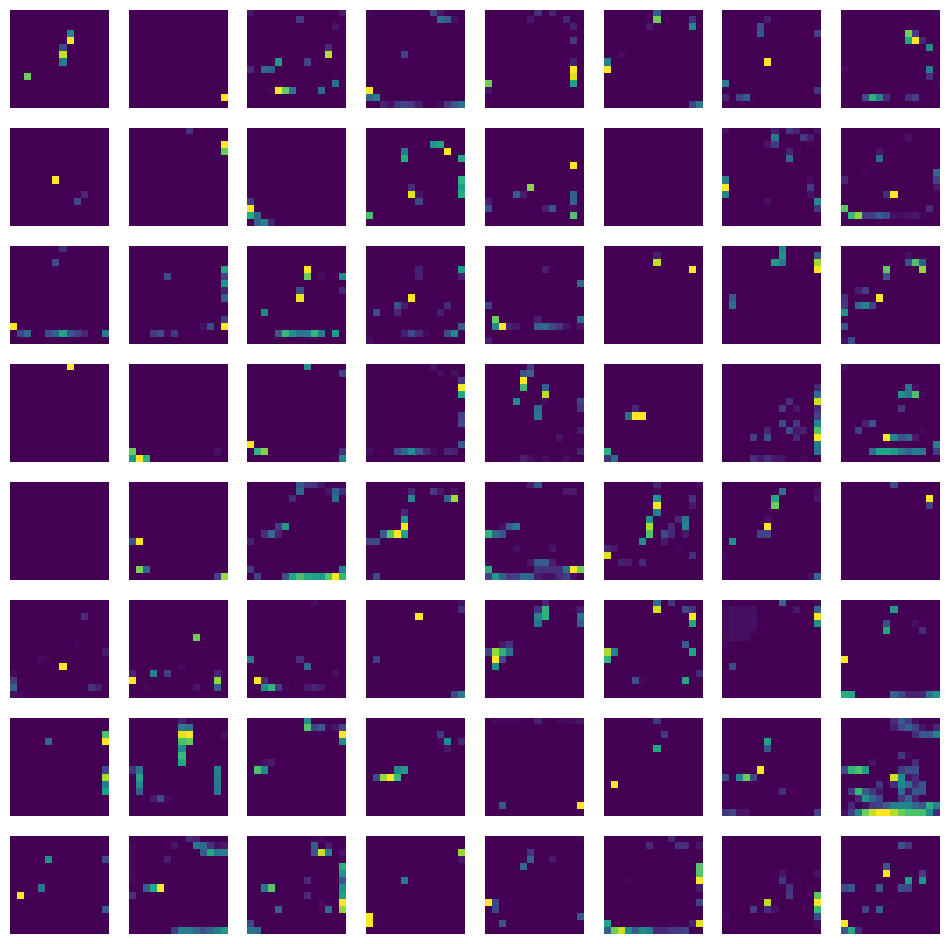

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

* 두번째 합성곱 층의 첫 번째 필터가 앞서 출력 한 32개의 특성 맵과 곱해져 두 번째 합성곱 층의 첫 번째 특성 맵이 됩니다.

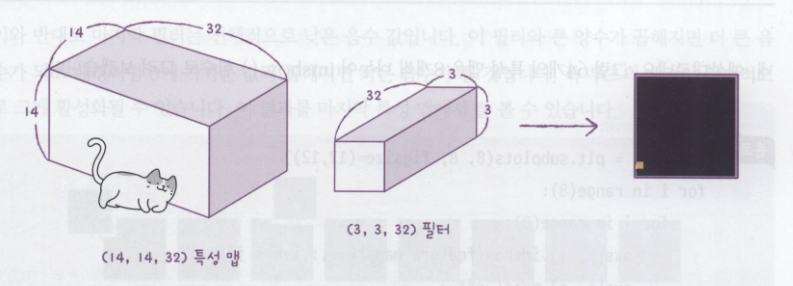

* 위의 그림을 보면 특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기 어렵습니다.
* 이러한 현상은 합성곱 층을 많이 쌓을수록 심해집니다. 
* 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습

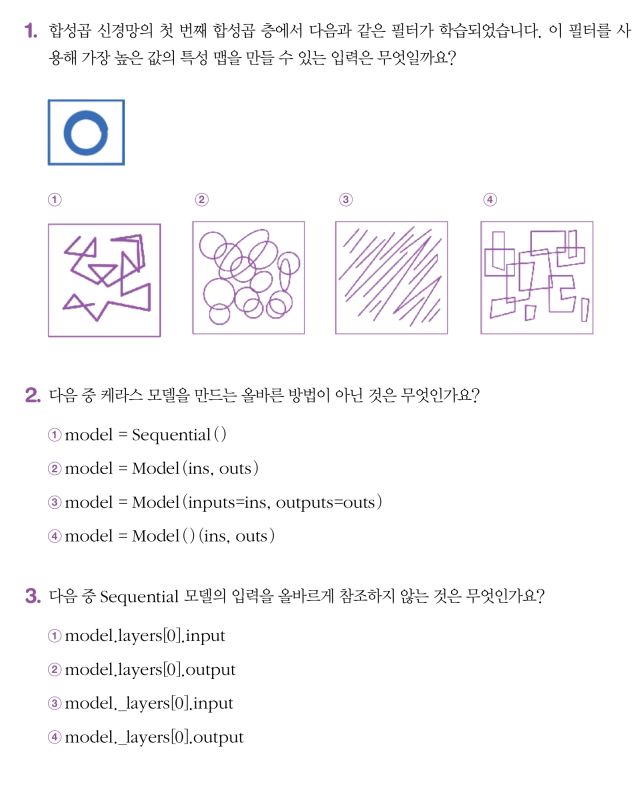